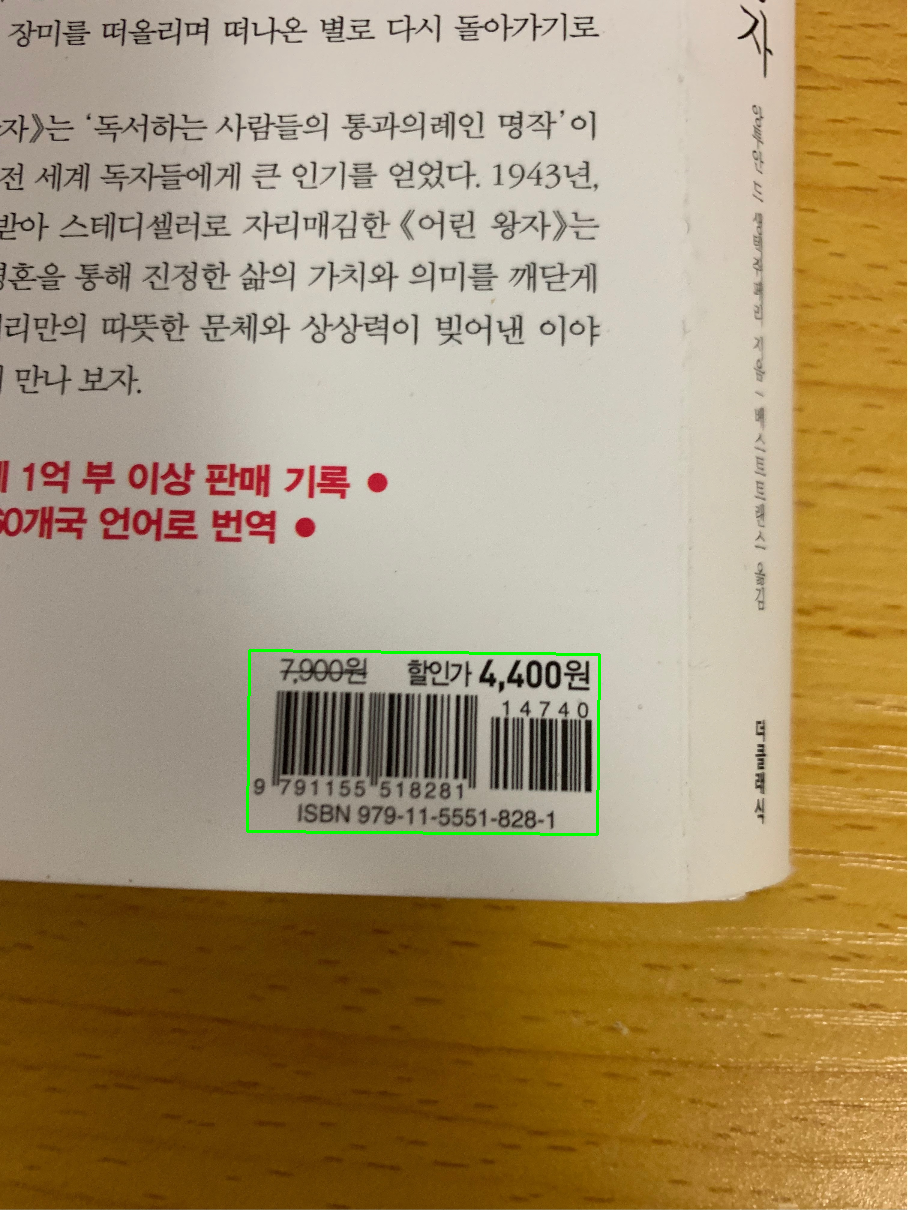

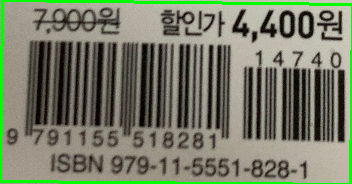

True

In [42]:

import numpy as np 
import cv2
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow


image = cv2.imread('barcode.jpg')
image = cv2.resize(image,None,fx=0.3, fy=0.3)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

 
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

 
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)


blurred = cv2.GaussianBlur(gradient, (9,9),0)
(_, thresh) = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)



closed = cv2.erode(thresh, None, iterations = 4)
closed = cv2.dilate(thresh, None, iterations = 4)


(_, cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
 
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))
 

cv2.drawContours(image, [box], -1, (0, 255, 0), 2)
cv2_imshow(image)
#cv2_imshow(gradient)
#cv2_imshow(blurred)
#cv2_imshow(thresh)
#cv2_imshow(closed)

img_crop = image[box[2][1]:box[0][1], box[1][0]:box[3][0]]
cv2_imshow(img_crop)
cv2.imwrite("img_crop.jpg",img_crop)


In [29]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,596 kB/s)
debconf: unable to initi

In [0]:
import pytesseract
import shutil
try:
 from PIL import Image
except ImportError:
 import Image
 import cv2

In [44]:
image_path_in_colab='img_crop.jpg'
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

geld, 400%

in

ISBN 979-11-5551-828-1


In [57]:
import re
text = extractedInformation
text=text.replace('\n',' ')
line = re.sub('[-,\n]','', text)
print(line)

geld 400%  in  ISBN 9791155518281


In [58]:
n=line.find('N')
isbn_no=line[n+2:n+15]

print(isbn_no)

9791155518281
